# Выборка #4

In [1]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [2]:
dataset = Dataset(4)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    4    |          1000         |        10000         |      50     |       16.4       |
+---------+-----------------------+----------------------+-------------+------------------+


Попробуем сбалансировать выборку оверсэмплингом

In [3]:
from imblearn.over_sampling import SMOTE
#'minority': повторная выборка только класса меньшинства; 
#'not majority': повторная выборка всех классов кроме большого; 
smote = SMOTE(sampling_strategy ='not majority')
X_sm, y_sm = smote.fit_resample(dataset.X1, dataset.y1)
print(y_sm.shape)
print(X_sm.shape)

(1672,)
(1672, 50)


In [4]:
dataset.X1 = X_sm
dataset.y1 = y_sm
dataset.n_samples = 1672

In [7]:
dataset.get_scaled_data()
dataset.get_divergences()

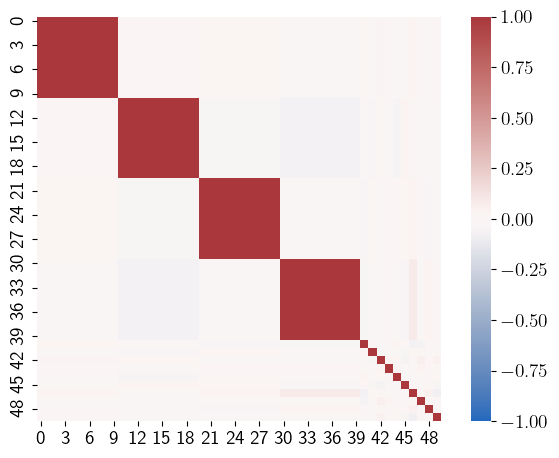

In [3]:
dataset.heatmap()

Избавимся от скоррелированных признаков

In [4]:
drop_cols = [i for i in range(1, 40) if i%10 != 0]

dataset.X1_scaled = dataset.X1_scaled.drop(dataset.X1_scaled.columns[drop_cols], axis=1)

In [5]:
dataset.n_features = dataset.X1_scaled.shape[1]

In [6]:
new_cols = [i for i in range(dataset.n_features)]
dataset.X1_scaled.columns = new_cols

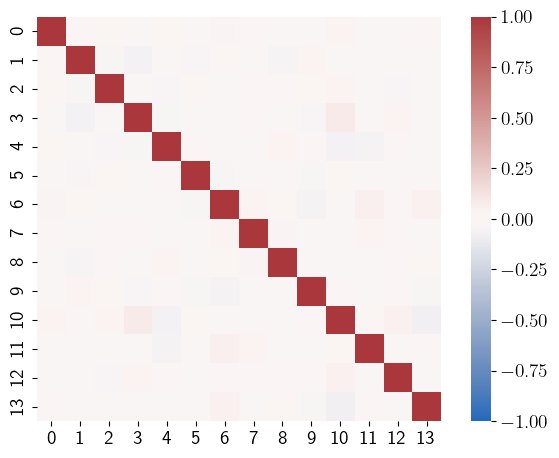

In [7]:
dataset.heatmap()

In [27]:
dataset.divergences(verbose=True)

KL-divergence for feature #0: 0.016, Class 1: N(-0.075, 0.917), Class 0: N(0.015, 1.015)
KL-divergence for feature #1: 0.018, Class 1: N(0.155, 1.038), Class 0: N(-0.030, 0.990)
KL-divergence for feature #2: 0.004, Class 1: N(0.028, 1.050), Class 0: N(-0.006, 0.990)
KL-divergence for feature #3: 0.007, Class 1: N(-0.076, 1.047), Class 0: N(0.015, 0.990)
KL-divergence for feature #4: 0.016, Class 1: N(0.103, 0.933), Class 0: N(-0.020, 1.011)
KL-divergence for feature #5: 0.000, Class 1: N(-0.012, 1.016), Class 0: N(0.002, 0.997)
KL-divergence for feature #6: 0.008, Class 1: N(-0.103, 1.006), Class 0: N(0.020, 0.997)
KL-divergence for feature #7: 0.011, Class 1: N(0.091, 0.946), Class 0: N(-0.018, 1.009)
KL-divergence for feature #8: 0.004, Class 1: N(-0.077, 1.002), Class 0: N(0.015, 0.999)
KL-divergence for feature #9: 0.005, Class 1: N(-0.005, 1.062), Class 0: N(0.001, 0.987)
KL-divergence for feature #10: 0.001, Class 1: N(0.022, 1.023), Class 0: N(-0.004, 0.995)
KL-divergence for fe

array([0.01566837, 0.01808748, 0.00384503, 0.00683489, 0.01573805,
       0.00044798, 0.00750789, 0.01096679, 0.00424506, 0.00501508,
       0.00106682, 0.00830783, 0.00017414, 0.00488477])

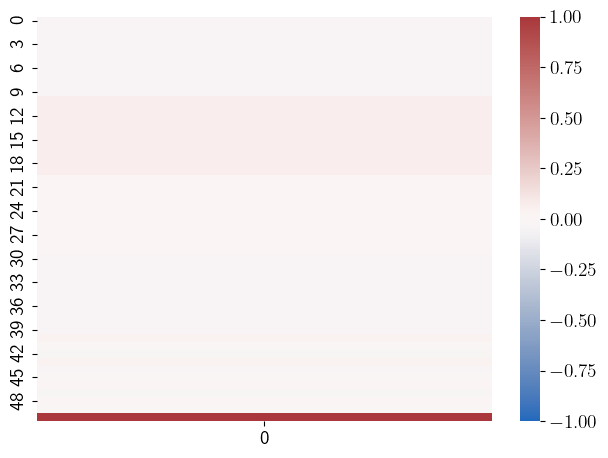

In [28]:
dataset.target_corr(annot=False)

In [29]:
#make_histplot(dataset.df)

Признак номер 1

Класс 1:
Среднее значение (mu): 0.1545606960019254
Стандартное отклонение (std): 1.0381468817905863

Класс 0:
Среднее значение (mu): -0.030320519311382525
Стандартное отклонение (std): 0.9895161037273935


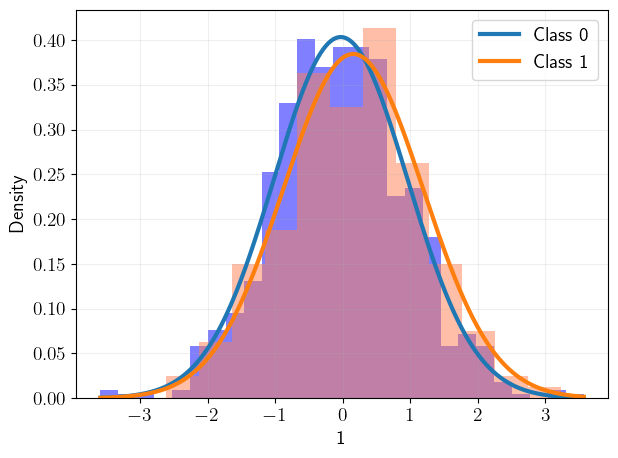

In [12]:
dataset.approx(number_of_feature = 1)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [8]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

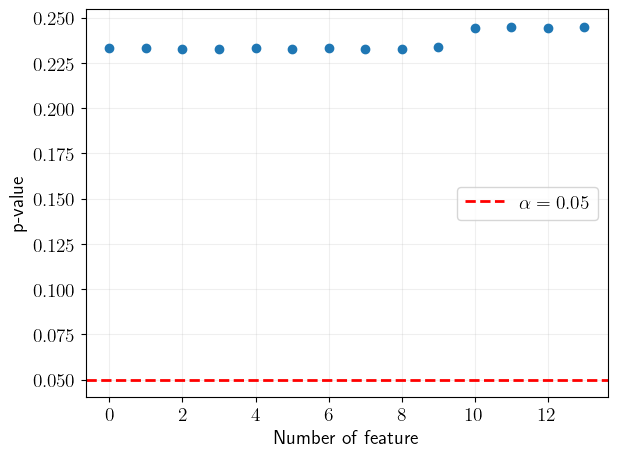

In [9]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

---

Второй способ борьбы с скоррелированными признаками, стоит рассматривать его, так как с PCA мы не теряем ту информацию, о которой говорил Адуенко

In [8]:
# Создание объекта PCA с указанием количества компонент (новых признаков)
pca = PCA(n_components=50)

# Преобразование признаков с помощью PCA
dataset.X1_scaled = pca.fit_transform(dataset.X1_scaled.values)

In [9]:
dataset.X1_scaled = pd.DataFrame(dataset.X1_scaled)

In [10]:
dataset.n_features = dataset.X1_scaled.shape[1]

In [11]:
new_cols = [i for i in range(dataset.n_features)]
dataset.X1_scaled.columns = new_cols

In [12]:
dataset.get_divergences()

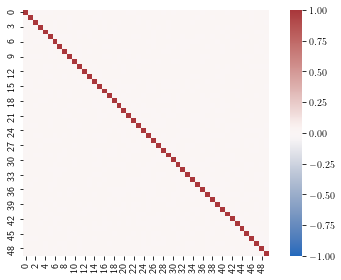

In [10]:
dataset.heatmap()

---

### Logistic Regression

100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


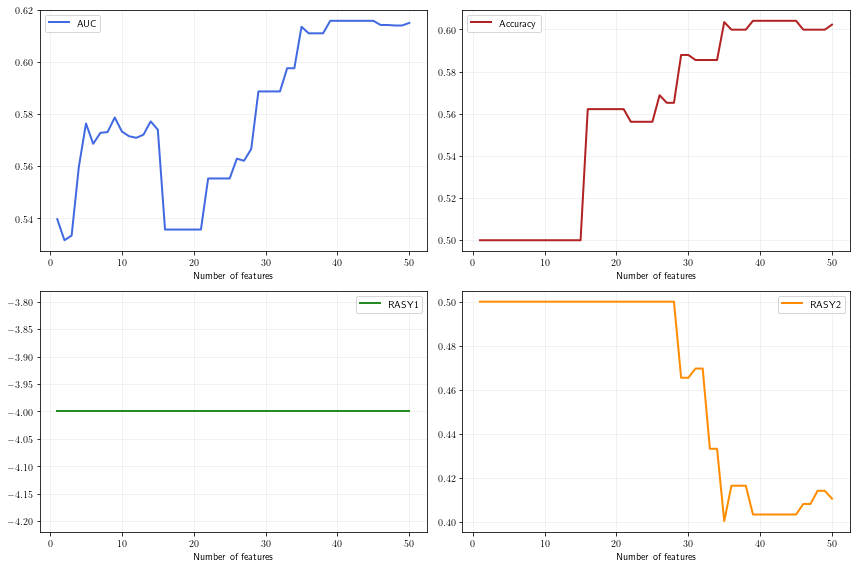

In [13]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression())

100%|██████████| 11/11 [00:26<00:00,  2.38s/it]


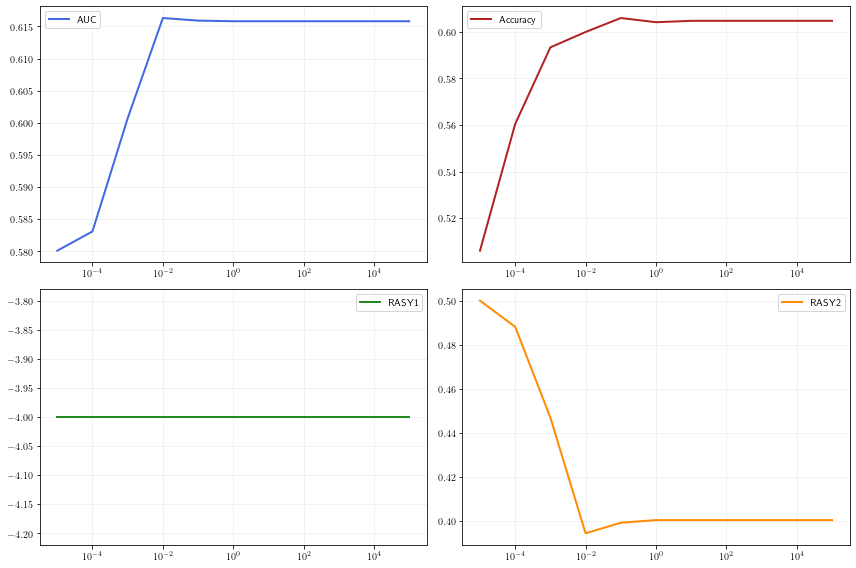

In [14]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-5, 5, 11))

### Naive Bayes

100%|██████████| 50/50 [00:13<00:00,  3.79it/s]


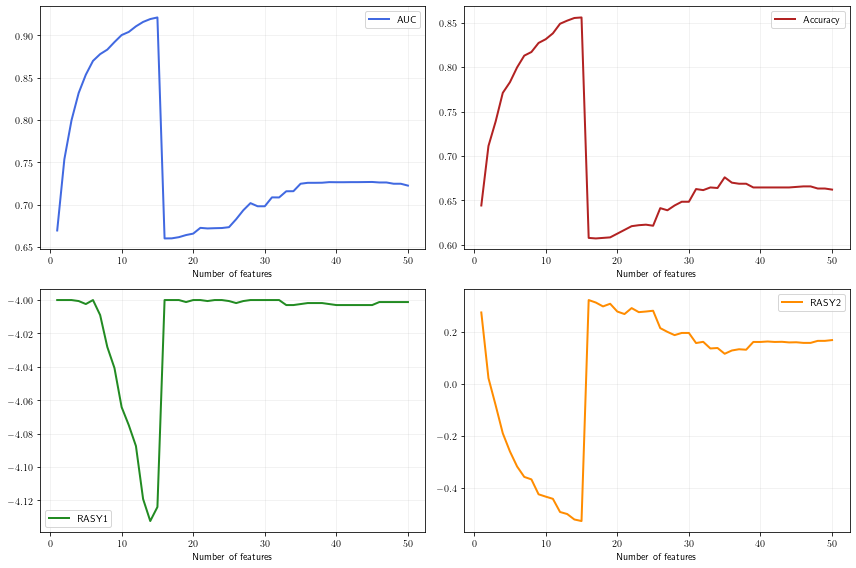

In [39]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB())

### Random forest

100%|██████████| 50/50 [37:09<00:00, 44.59s/it]


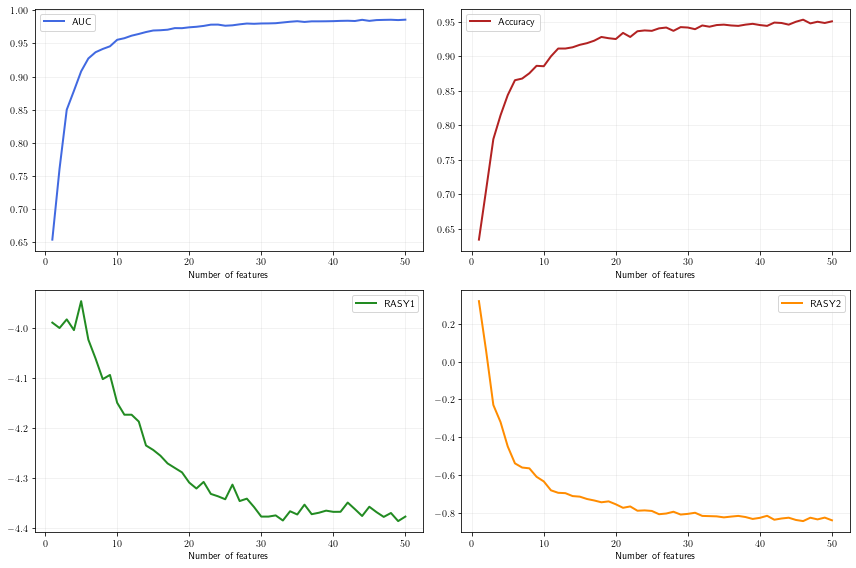

In [17]:
from sklearn.ensemble import RandomForestClassifier

features_cols_rfc = dataset.metrics_n_features_dependence(RandomForestClassifier(n_estimators=500))

### Saving aswers 

In [45]:
model_AUC = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
model_Accuracy = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
model_RASY1 = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
model_RASY2 = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [46]:
features_AUC, cols_AUC = features_cols_rfc['AUC']['features'], features_cols_rfc['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_rfc['Accuracy']['features'], features_cols_rfc['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_rfc['RASY1']['features'], features_cols_rfc['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_rfc['RASY2']['features'], features_cols_rfc['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [47]:
t_Accuracy = features_cols_rfc['Accuracy']['t']
t_RASY1 = features_cols_rfc['RASY1']['t']
t_RASY2 = features_cols_rfc['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [48]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [49]:
[cols_list[i].shape for i in range(4)]

[(50,), (46,), (49,), (46,)]

In [50]:
thresholds_list

[0.5050505050505051, 0.6767676767676768, 0.5050505050505051]